<a href="https://colab.research.google.com/github/mahedishato/Tabular-Playground-Series-_Sep-2022/blob/main/Tabular_Playground_Series__Sep_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [7]:
!unzip /content/drive/MyDrive/Datasets/CSV/tabular/train.csv.zip

Archive:  /content/drive/MyDrive/Datasets/CSV/tabular/train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [11]:
!unzip /content/drive/MyDrive/Datasets/CSV/tabular/test.csv.zip

Archive:  /content/drive/MyDrive/Datasets/CSV/tabular/test.csv.zip
  inflating: test.csv                


In [8]:
import numpy as np
import pandas as pd


In [9]:
train = pd.read_csv('train.csv')

In [19]:
test = pd.read_csv('test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Datasets/CSV/tabular/sample_submission.csv')

In [16]:
test.head()      

,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques


In [17]:
test.shape

(17520, 5)

In [18]:
train.shape

(70128, 6)

In [20]:
submission.head()

,row_id,num_sold
0,70128,100
1,70129,100
2,70130,100
3,70131,100
4,70132,100


In [21]:
submission.shape

(17520, 2)

In [22]:
train.head()

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    70128 non-null  int64 
 1   date      70128 non-null  object
 2   country   70128 non-null  object
 3   store     70128 non-null  object
 4   product   70128 non-null  object
 5   num_sold  70128 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.2+ MB


In [24]:
train.isnull().sum()

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [25]:
train['date'] 

0        2017-01-01
1        2017-01-01
2        2017-01-01
3        2017-01-01
4        2017-01-01
            ...    
70123    2020-12-31
70124    2020-12-31
70125    2020-12-31
70126    2020-12-31
70127    2020-12-31
Name: date, Length: 70128, dtype: object

In [26]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [27]:
train['date'] 

0       2017-01-01
1       2017-01-01
2       2017-01-01
3       2017-01-01
4       2017-01-01
           ...    
70123   2020-12-31
70124   2020-12-31
70125   2020-12-31
70126   2020-12-31
70127   2020-12-31
Name: date, Length: 70128, dtype: datetime64[ns]

In [29]:
train.describe()

,row_id,num_sold
count,70128.000000,70128.000000
mean,35063.500000,194.296986
std,20244.354176,126.893874
min,0.000000,19.000000
25%,17531.750000,95.000000
50%,35063.500000,148.000000
75%,52595.250000,283.000000
max,70127.000000,986.000000


In [30]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
row_id,70128.0,35063.500000,20244.354176,0.0,17531.75,35063.5,52595.25,70127.0
num_sold,70128.0,194.296986,126.893874,19.0,95.00,148.0,283.00,986.0


In [31]:
train.duplicated().sum()

0

In [32]:
test.duplicated().sum()

0

In [34]:
train.describe()

,row_id,num_sold
count,70128.000000,70128.000000
mean,35063.500000,194.296986
std,20244.354176,126.893874
min,0.000000,19.000000
25%,17531.750000,95.000000
50%,35063.500000,148.000000
75%,52595.250000,283.000000
max,70127.000000,986.000000


In [38]:
for col in train.columns:
    print(col, len(train[col].unique()))

row_id 70128
date 1461
country 6
store 2
product 4
num_sold 699


In [44]:
!pip install catboost
!pip install ipywidgets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 25.4 MB/s 


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgbm
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV , cross_val_score ,cross_validate

Text(0.5, 1.0, 'Total Store Sales')

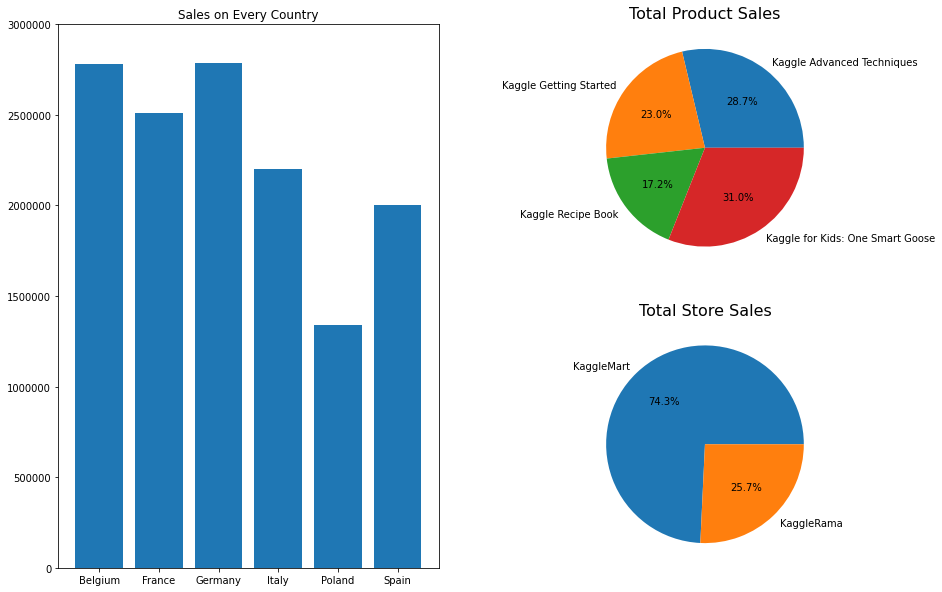

In [43]:
sold_product = train.groupby(['product'])['num_sold'].sum()
sold_store = train.groupby(['store'])['num_sold'].sum()
sold_country = train.groupby(['country'])['num_sold'].sum()

fig = plt.figure(figsize=(15,10))
fig.set_facecolor('white')

ax1 = fig.add_subplot(1, 2, 1)
ax1.bar(sold_country.keys(), sold_country.values)
ax1.set_title('Sales on Every Country')
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_ylim(0, 3e6)

ax2 = fig.add_subplot(2, 2, 2)
ax2.pie(sold_product.values, labels=sold_product.keys(), autopct="%.1f%%")
ax2.set_title('Total Product Sales', fontsize=16)

ax3 = fig.add_subplot(2, 2, 4)
ax3.pie(sold_store.values, labels=sold_store.keys(), autopct="%.1f%%")
ax3.set_title('Total Store Sales', fontsize=16)

Text(0.5, 1.0, 'Product Sales by Store')

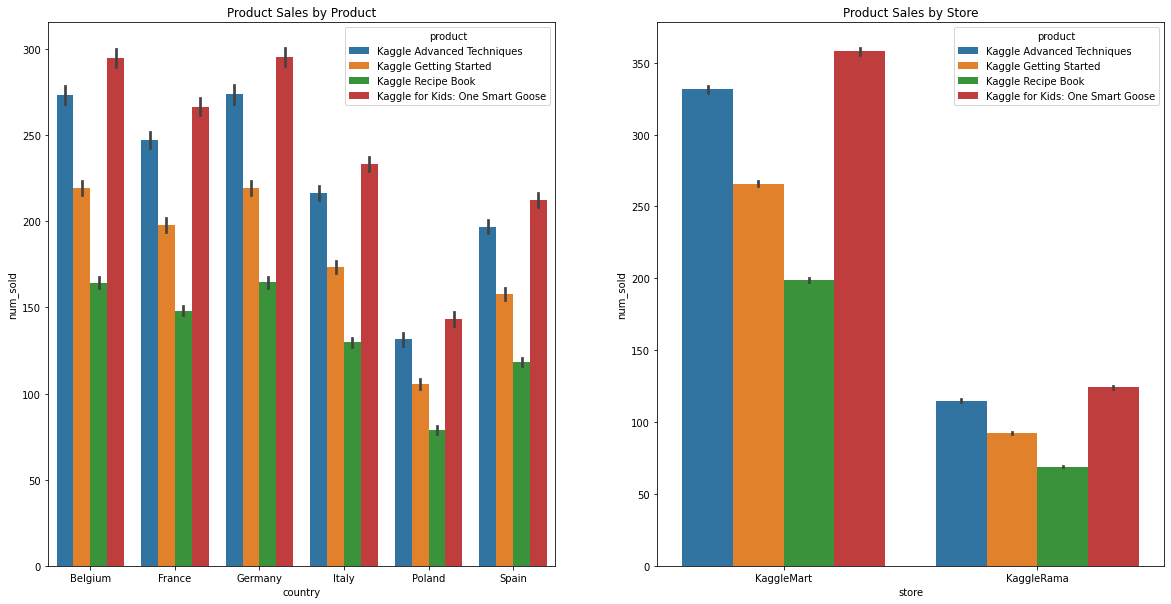

In [45]:

fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white')

ax1 = fig.add_subplot(1, 2, 1)
sns.barplot(data=train, x='country', y='num_sold', hue='product')
ax1.set_title('Product Sales by Product')

ax2 = fig.add_subplot(1, 2, 2)
sns.barplot(data=train, x='store', y='num_sold', hue='product')
ax2.set_title("Product Sales by Store")


In [46]:
monthly_sales = train.groupby(['country', 'store', 'product', pd.Grouper(key='date', freq='MS')])['num_sold'].sum().reset_index()

In [47]:
monthly_sales.head()

,country,store,product,date,num_sold
0,Belgium,KaggleMart,Kaggle Advanced Techniques,2017-01-01,13345
1,Belgium,KaggleMart,Kaggle Advanced Techniques,2017-02-01,12556
2,Belgium,KaggleMart,Kaggle Advanced Techniques,2017-03-01,14137
3,Belgium,KaggleMart,Kaggle Advanced Techniques,2017-04-01,14575
4,Belgium,KaggleMart,Kaggle Advanced Techniques,2017-05-01,14338


In [48]:
monthly_sales.tail()

,country,store,product,date,num_sold
2299,Spain,KaggleRama,Kaggle for Kids: One Smart Goose,2020-08-01,4578
2300,Spain,KaggleRama,Kaggle for Kids: One Smart Goose,2020-09-01,4254
2301,Spain,KaggleRama,Kaggle for Kids: One Smart Goose,2020-10-01,4644
2302,Spain,KaggleRama,Kaggle for Kids: One Smart Goose,2020-11-01,4437
2303,Spain,KaggleRama,Kaggle for Kids: One Smart Goose,2020-12-01,5033


In [49]:

monthly_sales_country = monthly_sales.groupby(['country','date'])['num_sold'].sum().reset_index()
monthly_sales_product = monthly_sales.groupby(['product', 'date'])['num_sold'].sum().reset_index()
monthly_sales_store = monthly_sales.groupby(['store', 'date'])['num_sold'].sum().reset_index()

In [50]:
print(monthly_sales_country.head(2))
print(monthly_sales_product.head(2))
print(monthly_sales_store.head(2))

   country       date  num_sold
0  Belgium 2017-01-01     60995
1  Belgium 2017-02-01     51691
                      product       date  num_sold
0  Kaggle Advanced Techniques 2017-01-01     83101
1  Kaggle Advanced Techniques 2017-02-01     76480
        store       date  num_sold
0  KaggleMart 2017-01-01    209188
1  KaggleMart 2017-02-01    175275


Text(0.5, 1.0, 'Monthly sales by Store')

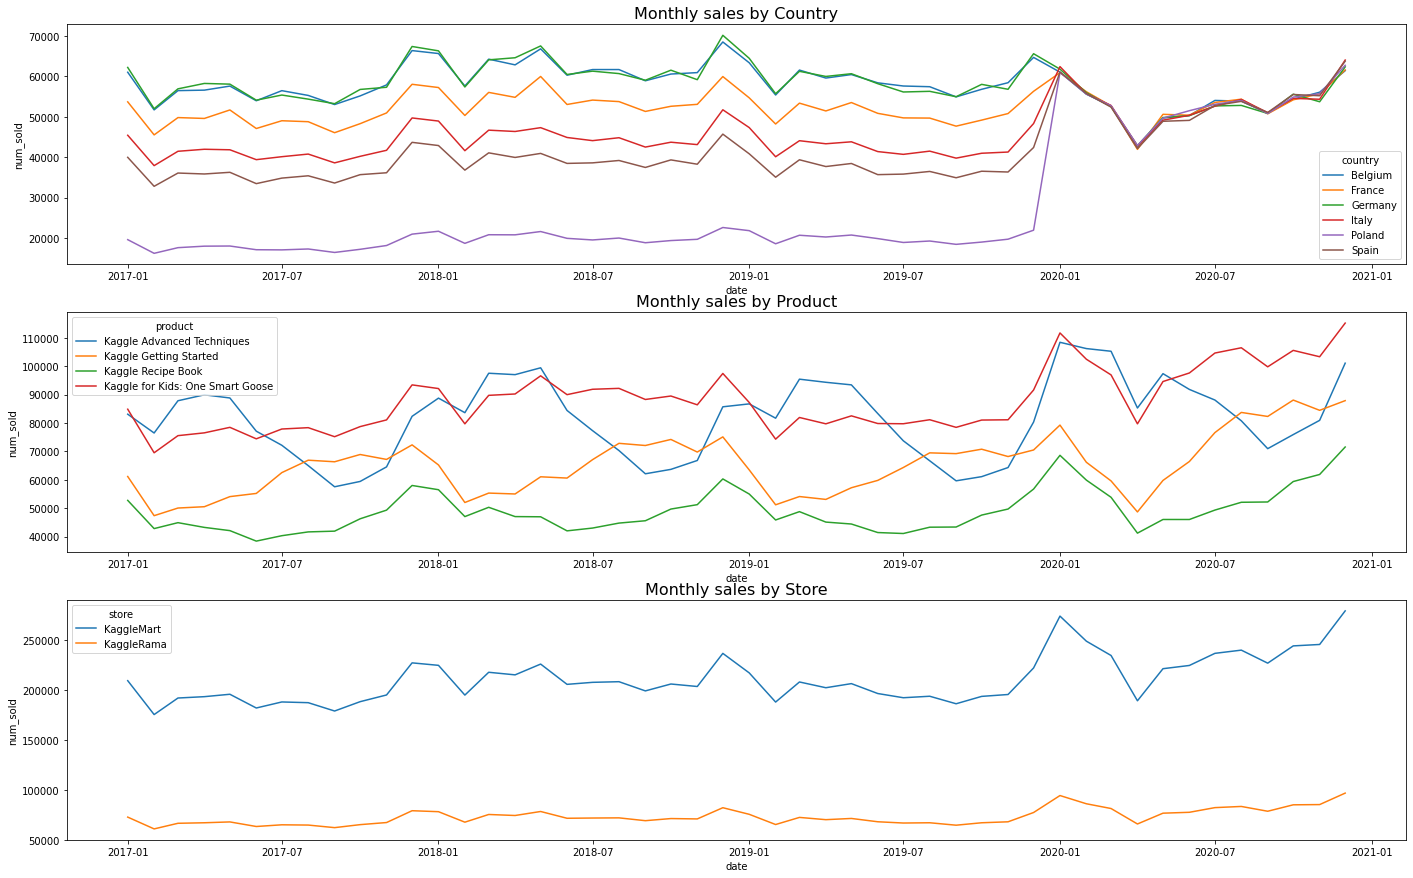

In [51]:
fig = plt.figure(figsize=(24, 15))
fig.set_facecolor('white')

ax1 = fig.add_subplot(3, 1, 1)
sns.lineplot(data=monthly_sales_country, x='date', y='num_sold', hue='country')
ax1.set_title("Monthly sales by Country", fontsize= 16)

ax2 = fig.add_subplot(3, 1, 2)
sns.lineplot(data=monthly_sales_product, x='date', y='num_sold', hue='product')
ax2.set_title("Monthly sales by Product", fontsize= 16)

ax3 = fig.add_subplot(3, 1, 3)
sns.lineplot(data=monthly_sales_store, x='date', y='num_sold', hue='store')
ax3.set_title("Monthly sales by Store", fontsize= 16)

Text(0.5, 1.0, 'Time Series of Sales by Product')

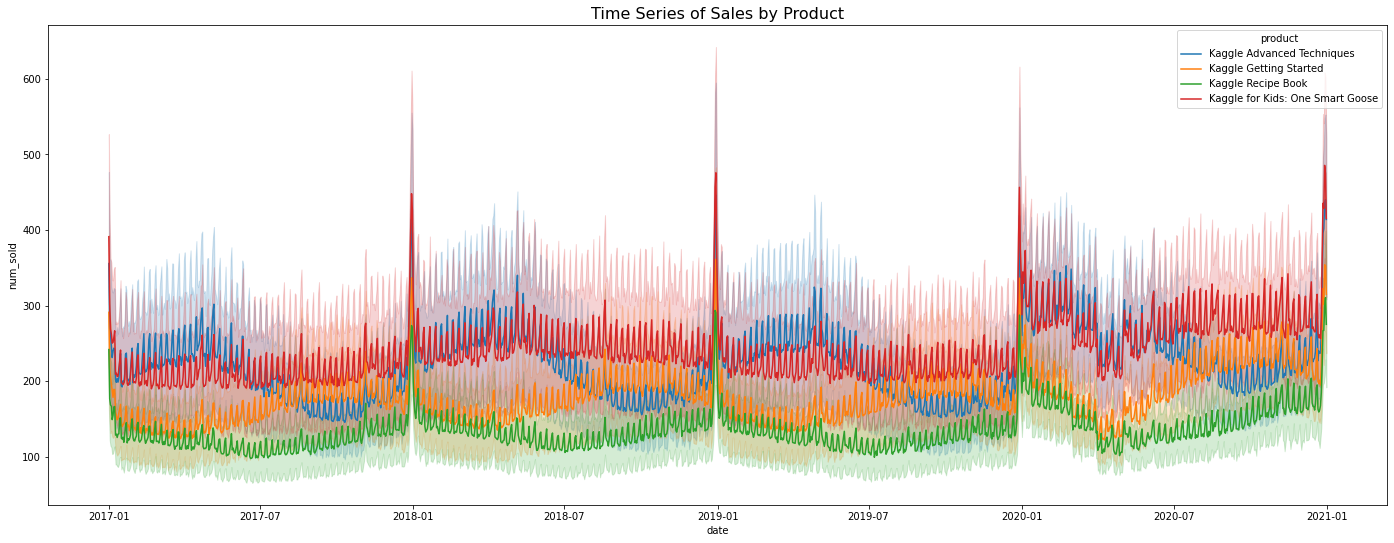

In [54]:
fig = plt.figure(figsize=(24,30))
fig.set_facecolor('white')

ax1 = fig.add_subplot(3, 1, 1)
sns.lineplot(data=train,x='date',y='num_sold',hue='product')
ax1.set_title("Time Series of Sales by Product",fontsize=16)



Text(0.5, 1.0, 'Time Series of Sales by Country')

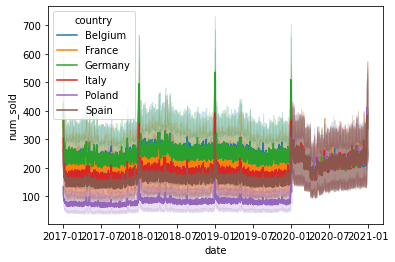

In [55]:
ax1 = fig.add_subplot(3, 1, 2)
sns.lineplot(data=train,x='date',y='num_sold',hue='country')
ax1.set_title("Time Series of Sales by Country",fontsize=16)



Text(0.5, 1.0, 'Time Series of Sales by Store')

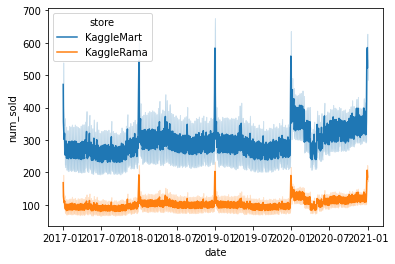

In [56]:
ax1 = fig.add_subplot(3, 1, 3)
sns.lineplot(data=train,x='date',y='num_sold',hue='store')
ax1.set_title("Time Series of Sales by Store",fontsize=16) 

In [58]:
def format_date(df):
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['dayOfYear'] = df['date'].dt.dayofyear
    df['weekday'] = df['date'].dt.weekday
    return df

train = format_date(train)
test = format_date(test)

In [60]:
train.head()

,row_id,date,country,store,product,num_sold,year,month,day,dayOfYear,weekday
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017,1,1,1,6
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017,1,1,1,6
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,2017,1,1,1,6
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017,1,1,1,6
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017,1,1,1,6


In [61]:
le = LabelEncoder()
cols = ['country', 'store', 'product']
for col in cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

In [62]:
train.head()

,row_id,date,country,store,product,num_sold,year,month,day,dayOfYear,weekday
0,0,2017-01-01,0,0,0,663,2017,1,1,1,6
1,1,2017-01-01,0,0,1,615,2017,1,1,1,6
2,2,2017-01-01,0,0,2,480,2017,1,1,1,6
3,3,2017-01-01,0,0,3,710,2017,1,1,1,6
4,4,2017-01-01,0,1,0,240,2017,1,1,1,6


In [65]:


train_data = train.drop(['date', 'row_id'], axis=1)
test_data = test.drop(['date', 'row_id'], axis=1)



In [66]:


train_data.head()



,country,store,product,num_sold,year,month,day,dayOfYear,weekday
0,0,0,0,663,2017,1,1,1,6
1,0,0,1,615,2017,1,1,1,6
2,0,0,2,480,2017,1,1,1,6
3,0,0,3,710,2017,1,1,1,6
4,0,1,0,240,2017,1,1,1,6


In [67]:
X = train_data.drop('num_sold', axis=1)
y = train_data['num_sold'] 

In [69]:
X

,country,store,product,year,month,day,dayOfYear,weekday
0,0,0,0,2017,1,1,1,6
1,0,0,1,2017,1,1,1,6
2,0,0,2,2017,1,1,1,6
3,0,0,3,2017,1,1,1,6
4,0,1,0,2017,1,1,1,6
...,...,...,...,...,...,...,...,...
70123,5,0,3,2020,12,31,366,3
70124,5,1,0,2020,12,31,366,3
70125,5,1,1,2020,12,31,366,3
70126,5,1,2,2020,12,31,366,3


In [70]:
lgb = LGBMRegressor(random_state=42, boosting_type='dart')
cb = CatBoostRegressor(random_state=42, verbose=0)
lr = LinearRegression()

models = [lgb, cb, lr]

In [71]:
def get_scores(cv_scores):
    scores = np.zeros(test_data.shape[0])
    for estimator in cv_scores['estimator']:
        scores += estimator.predict(test_data)
    scores /= len(cv_scores['estimator'])
    return scores

In [72]:
def smape(a, f):
    # Symmetric mean absolute percentage error (SMAPE or sMAPE) is an accuracy measure based on percentage (or relative) errors
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

smape_score = make_scorer(smape, greater_is_better=False)

scalar = StandardScaler()

res = pd.DataFrame()
row_number = 0
results = []
names = []
prob_scores = []

for model in models:
    model_name=model.__class__.__name__
    pipeline = Pipeline([('transformer', scalar), ('estimator', model)])
    print(model_name, 'training')

    cv_results = cross_validate(pipeline, X, y, cv=42, scoring=smape_score, return_train_score=True, return_estimator=True, n_jobs=-1)

    res.loc[row_number,'Model Name'] = model_name
    res.loc[row_number, 'Train Score Mean'] = cv_results['train_score'].mean()
    res.loc[row_number, 'Test Score Mean'] = cv_results['test_score'].mean()
    res.loc[row_number, 'Fit Time Mean'] = cv_results['fit_time'].mean()
    results.append(cv_results)
    names.append(model_name)
    prob_scores.append(get_scores(cv_results))

    row_number+=1

LGBMRegressor training
CatBoostRegressor training
LinearRegression training


In [73]:


display(res.style.background_gradient())



,Model Name,Train Score Mean,Test Score Mean,Fit Time Mean
0,LGBMRegressor,-11.356153,-11.911337,3.398851
1,CatBoostRegressor,-4.545609,-5.595847,23.711495
2,LinearRegression,-32.424895,-32.607023,0.039159


In [74]:
params_cb = {
    'depth'         : [8, 10],
    'learning_rate' : [0.1],
    'iterations'    : [50, 100],
    'random_state'  : [42], 
    'verbose'       : [0],
    }

grid_search_cb = GridSearchCV(
    estimator=cb,
    param_grid=params_cb,
    cv = 42,
    scoring=smape_score,
    n_jobs = -1
).fit(X, y)

cb_best = grid_search_cb.best_estimator_
print('CB Best Params',grid_search_cb.best_params_)

CB Best Params {'depth': 10, 'iterations': 100, 'learning_rate': 0.1, 'random_state': 42, 'verbose': 0}


In [76]:


pipeline = Pipeline([('transformer', scalar), ('estimator', cb_best)])
cv_results = cross_validate(pipeline, X, y, cv=5, scoring=smape_score, return_train_score=True, return_estimator=True, n_jobs=-1)
np.mean(cv_results['test_score'])



-11.928928505674998

In [77]:


scores = np.zeros(test_data.shape[0])
for estimator in cv_results['estimator']:
    scores += estimator.predict(test_data)
    
scores /= len(cv_results['estimator'])



In [78]:


submission["num_sold"] = scores
submission.head()



,row_id,num_sold
0,70128,452.243775
1,70129,357.376204
2,70130,309.019029
3,70131,486.330023
4,70132,161.599881


In [79]:


submission.to_csv("submission.csv", index = False)

